In [1]:
import json
import numpy as np
import tensorflow as tf
import seaborn as sns
from tensorflow import keras
import glob
import plotly.express as px
from tensorflow.keras import layers
from tqdm import tqdm
import matplotlib.pyplot as plt
import os
from matplotlib import cm
from matplotlib.pyplot import figure
from numpy import linspace
!pip install idx2numpy
import pandas as pd
import idx2numpy

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import tensorflow as tf
import glob
import idx2numpy
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras import regularizers
import tensorflow.keras as keras
print('TensoFlow Version: ', tf.__version__)

  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-cp36-none-any.whl size=7905 sha256=73c8a471b35bc0d2d462949028f1cd8f727b4538d28001fa1f8b869f72af7bdb
  Stored in directory: /root/.cache/pip/wheels/7a/c1/da/284ce80a748fab898b8d1fa95468a386e7cf3b81da18511f9d
Successfully built idx2numpy
TensoFlow Version:  2.3.0


In [2]:
%cd /content/drive/My Drive/projects/Deep_Learning_F20_Assignments/Assignment-06/Classifications

/content/drive/My Drive/projects/Deep_Learning_F20_Assignments/Assignment-06/Classifications



#Assignment Set 6

by **Amir Mehrpanah** for Deep Learing Course at Data Science Center, SBU



In [3]:
#@title Manual Data Injection
from six.moves import cPickle as pickle
import platform
import numpy as np
 
def load_files(filenames):
    data = np.array([])
    labels = np.array([])
    for name in filenames:
        with open(name, 'rb') as f:
            mydict = pickle.load(f, encoding='latin1')

        # The labels have different names in the two datasets.
        label_func = lambda x: np.array(x['fine_labels'], dtype='int32')
        newlabels = label_func(mydict)
        if data.size:
            data = np.vstack([data, mydict['data']])
            labels = np.hstack([labels, newlabels])
        else:
            data = mydict['data']
            labels = newlabels
    data = np.reshape(data, [-1, 3, 32, 32], order='C')
    data = np.transpose(data, [0, 2, 3, 1])

    return data, labels

def load_CIFAR100(data_dir):
    """ load all of cifar """
    train_files = ['train']
    train_files = [os.path.join(data_dir, f) for f in train_files]
    test_files = ['test']
    test_files = [os.path.join(data_dir, f) for f in test_files]
    num_classes = 100
    train_data, train_labels = load_files(train_files)
    test_data, test_labels = load_files(test_files)

    return train_data, train_labels, test_data, test_labels
 
def get_CIFAR100_data(val_size=5000):
    # Load the raw CIFAR-100 data
    cifar100_dir = 'data/cifar/cifar-100-python/'
    x_train, y_train, x_test, y_test = load_CIFAR100(cifar100_dir)
    # Subsample the data
 
    x_train, x_val = np.split(x_train,
                              [x_train.shape[0]-val_size])
    y_train, y_val = np.split(y_train,
                              [y_train.shape[0]-val_size])
    
    x_train = x_train.astype('float32')
    x_val = x_val.astype('float32')
    x_test = x_test.astype('float32')
    
    std = StandardScaler()
    shape = x_train.shape
    x_train = std.fit_transform(x_train.reshape(-1,3072)).reshape(shape)
    shape = x_val.shape
    x_val = std.transform(x_val.reshape(-1,3072)).reshape(shape)
    shape = x_test.shape
    x_test = std.transform(x_test.reshape(-1,3072)).reshape(shape)

    return x_train, y_train, x_val, y_val, x_test, y_test
 
# Invoke the above function to get our data.
x_train, y_train, x_val, y_val, x_test, y_test = get_CIFAR100_data()
 
print('Train data shape: ', x_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', x_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', x_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (45000, 32, 32, 3)
Train labels shape:  (45000,)
Validation data shape:  (5000, 32, 32, 3)
Validation labels shape:  (5000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


## Model Without Data Augmentation

In [4]:
#@title Convolutional NN Tensorflow
#@markdown Training a convolutional neural network to compare the performance
epochs =  100#@param {type:"integer"}
verbose =  2#@param {type:"number"}
name = 'conv_clf'
 
x = input = keras.Input(shape=(32,32,3))
x = layers.Conv2D(64,3,activation='relu')(input)
x = layers.Conv2D(64,3,activation='relu')(x)
x = layers.MaxPool2D()(x)
x = layers.Conv2D(128,3,activation='relu')(x)
x = layers.MaxPool2D()(x)
x = layers.Conv2D(64,3,activation='relu')(x)
x = layers.Flatten()(x)
x = layers.Dense(256,activation='relu')(x)
output = layers.Dense(100,'softmax')(x)

model = keras.Model(inputs=input, outputs=output, name=name)
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
            optimizer='Adam',
            metrics=['accuracy'])
model.fit(x = x_train, y = y_train,
          batch_size=64, epochs=epochs,
          verbose=verbose,validation_data=(x_val,y_val),
          validation_batch_size = 64)

Epoch 1/100
704/704 - 4s - loss: 3.7612 - accuracy: 0.1261 - val_loss: 3.3827 - val_accuracy: 0.1954
Epoch 2/100
704/704 - 4s - loss: 2.9988 - accuracy: 0.2581 - val_loss: 2.8716 - val_accuracy: 0.2868
Epoch 3/100
704/704 - 4s - loss: 2.5698 - accuracy: 0.3424 - val_loss: 2.5879 - val_accuracy: 0.3392
Epoch 4/100
704/704 - 4s - loss: 2.2871 - accuracy: 0.4035 - val_loss: 2.4473 - val_accuracy: 0.3616
Epoch 5/100
704/704 - 4s - loss: 2.0716 - accuracy: 0.4481 - val_loss: 2.3790 - val_accuracy: 0.3902
Epoch 6/100
704/704 - 4s - loss: 1.9011 - accuracy: 0.4850 - val_loss: 2.4235 - val_accuracy: 0.3922
Epoch 7/100
704/704 - 4s - loss: 1.7376 - accuracy: 0.5234 - val_loss: 2.4210 - val_accuracy: 0.3958
Epoch 8/100
704/704 - 4s - loss: 1.5942 - accuracy: 0.5545 - val_loss: 2.4730 - val_accuracy: 0.3950
Epoch 9/100
704/704 - 4s - loss: 1.4650 - accuracy: 0.5848 - val_loss: 2.5645 - val_accuracy: 0.3826
Epoch 10/100
704/704 - 4s - loss: 1.3184 - accuracy: 0.6224 - val_loss: 2.6080 - val_accura

## Model With Data Augmentation

In [5]:
#@title Convolutional NN Tensorflow
#@markdown Training a convolutional neural network to compare the performance
epochs =  500#@param {type:"integer"}
verbose =  2#@param {type:"number"}
name = 'conv_clf_aug'
 
x = input = keras.Input(shape=(32,32,3))
x = layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical")(input)
x = layers.experimental.preprocessing.RandomContrast(0.2)(x)
x = layers.experimental.preprocessing.RandomRotation(3)(x)
x = layers.Conv2D(64,4,activation='relu')(x)
x = layers.Dropout(0.1)(x)
x = layers.Conv2D(64,4,activation='relu',kernel_regularizer=regularizers.l2(1e-4))(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.2)(x)
x = layers.Conv2D(128,3,activation='relu')(x)
x = layers.Dropout(0.1)(x)
x = layers.Conv2D(128,3,activation='relu',kernel_regularizer=regularizers.l2(1e-4))(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.2)(x)
x = layers.Conv2D(128,3,activation='relu')(x)
x = layers.Dropout(0.1)(x)
x = layers.Conv2D(128,3,activation='relu',kernel_regularizer=regularizers.l2(1e-4))(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.2)(x)
x = layers.Conv2D(256,3,activation='relu')(x)
x = layers.Dropout(0.1)(x)
x = layers.Conv2D(256,3,activation='relu',kernel_regularizer=regularizers.l2(1e-4))(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.2)(x)
x = layers.Conv2D(256,3,activation='relu')(x)
x = layers.Dropout(0.1)(x)
x = layers.Conv2D(256,3,activation='relu',kernel_regularizer=regularizers.l2(1e-4))(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.2)(x)
x = layers.Conv2D(512,3,activation='relu')(x)
x = layers.Dropout(0.1)(x)
x = layers.Conv2D(512,3,activation='relu',kernel_regularizer=regularizers.l2(1e-4))(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.2)(x)
x = layers.Conv2D(1024,3,activation='relu')(x)
x = layers.Dropout(0.1)(x)
x = layers.Conv2D(1024,3,activation='relu',kernel_regularizer=regularizers.l2(1e-4))(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)
x = layers.Flatten()(x)
x = layers.Dense(2048,activation='relu',kernel_regularizer=regularizers.l2(1e-5))(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(1024,activation='relu',kernel_regularizer=regularizers.l2(1e-5))(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(512,activation='relu',kernel_regularizer=regularizers.l2(1e-5))(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(256,activation='relu',kernel_regularizer=regularizers.l2(1e-5))(x)
output = layers.Dense(100,'softmax')(x)

model_aug = keras.Model(inputs=input, outputs=output, name=name)
model_aug.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
            optimizer='Adam',
            metrics=['accuracy'])

model_aug.fit(x = x_train, y = y_train,
          batch_size=128, epochs=epochs,
          verbose=verbose,validation_data=(x_val,y_val),
          validation_batch_size = 128)

Epoch 1/500
352/352 - 30s - loss: 4.7939 - accuracy: 0.0238 - val_loss: 4.7774 - val_accuracy: 0.0336
Epoch 2/500
352/352 - 29s - loss: 4.4907 - accuracy: 0.0398 - val_loss: 4.7530 - val_accuracy: 0.0348
Epoch 3/500
352/352 - 29s - loss: 4.3752 - accuracy: 0.0493 - val_loss: 4.5240 - val_accuracy: 0.0432
Epoch 4/500
352/352 - 29s - loss: 4.2910 - accuracy: 0.0525 - val_loss: 4.3960 - val_accuracy: 0.0472
Epoch 5/500
352/352 - 29s - loss: 4.2342 - accuracy: 0.0560 - val_loss: 4.2626 - val_accuracy: 0.0522
Epoch 6/500
352/352 - 29s - loss: 4.1938 - accuracy: 0.0585 - val_loss: 4.2108 - val_accuracy: 0.0612
Epoch 7/500
352/352 - 29s - loss: 4.1609 - accuracy: 0.0645 - val_loss: 4.2347 - val_accuracy: 0.0580
Epoch 8/500
352/352 - 29s - loss: 4.1297 - accuracy: 0.0678 - val_loss: 4.1018 - val_accuracy: 0.0746
Epoch 9/500
352/352 - 29s - loss: 4.0979 - accuracy: 0.0720 - val_loss: 4.3203 - val_accuracy: 0.0510
Epoch 10/500
352/352 - 29s - loss: 4.0857 - accuracy: 0.0735 - val_loss: 4.2287 - 

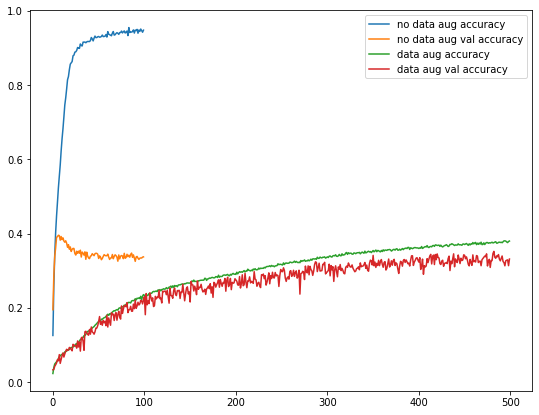

In [6]:
#@title Plotting Training History
plt.figure(figsize=(9,7))

plt.plot(model.history.history['accuracy'],label = 'no data aug accuracy')
plt.plot(model.history.history['val_accuracy'],label = 'no data aug val accuracy')
plt.plot(model_aug.history.history['accuracy'],label = 'data aug accuracy')
plt.plot(model_aug.history.history['val_accuracy'],label = 'data aug val accuracy')
plt.legend()
plt.show()